# moons - non linear dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.manifold import TSNE

In [2]:
X,y = make_moons(n_samples=10000,noise=0.1,random_state=42)

num_extra_features = 8
extra_features = np.random.normal(scale=0.1,size=(X.shape[0],num_extra_features))  
X_extended = np.hstack((X,extra_features))

df_moons = pd.DataFrame(X_extended,columns=[f"vab_{i+1}" for i in range(X_extended.shape[1])])
df_moons["target"] = y

In [3]:
df_moons

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target
0,0.455493,-0.125503,-0.073690,0.007148,-0.070106,-0.073503,0.033961,-0.076712,0.152614,-0.127183,1
1,-0.704217,0.041308,0.004495,0.031419,-0.093953,0.123181,-0.043611,-0.145589,-0.051010,-0.010903,0
2,0.413799,0.791322,0.021012,-0.130356,0.044793,-0.049688,-0.033703,-0.009176,0.204911,0.243696,0
3,-0.864049,0.138754,0.052871,-0.030130,-0.118363,0.140171,0.027461,-0.003970,-0.084262,-0.042069,0
4,-0.936268,0.359267,0.079918,-0.035151,0.108675,-0.097634,-0.122940,0.060390,-0.045682,0.072461,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,0.131744,-0.123398,-0.053741,-0.125656,-0.146788,0.094606,-0.068771,0.032727,1
9996,0.052471,0.474023,-0.065626,0.139791,0.079191,0.039954,-0.169025,0.058695,-0.170823,-0.170616,1
9997,-0.038031,0.245408,0.067752,-0.073473,-0.023170,0.038124,0.133715,-0.052788,0.022165,0.061612,1
9998,0.869802,0.523295,0.146190,-0.047300,0.216021,-0.001124,0.130500,-0.174057,0.106881,0.018546,0


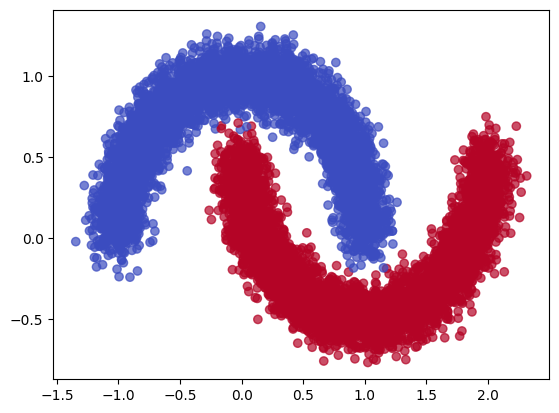

In [4]:
plt.scatter(df_moons.iloc[:,0],df_moons.iloc[:, 1],c=y,cmap='coolwarm',alpha=0.7)
plt.show()

In [5]:
df_moons

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target
0,0.455493,-0.125503,-0.073690,0.007148,-0.070106,-0.073503,0.033961,-0.076712,0.152614,-0.127183,1
1,-0.704217,0.041308,0.004495,0.031419,-0.093953,0.123181,-0.043611,-0.145589,-0.051010,-0.010903,0
2,0.413799,0.791322,0.021012,-0.130356,0.044793,-0.049688,-0.033703,-0.009176,0.204911,0.243696,0
3,-0.864049,0.138754,0.052871,-0.030130,-0.118363,0.140171,0.027461,-0.003970,-0.084262,-0.042069,0
4,-0.936268,0.359267,0.079918,-0.035151,0.108675,-0.097634,-0.122940,0.060390,-0.045682,0.072461,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,0.131744,-0.123398,-0.053741,-0.125656,-0.146788,0.094606,-0.068771,0.032727,1
9996,0.052471,0.474023,-0.065626,0.139791,0.079191,0.039954,-0.169025,0.058695,-0.170823,-0.170616,1
9997,-0.038031,0.245408,0.067752,-0.073473,-0.023170,0.038124,0.133715,-0.052788,0.022165,0.061612,1
9998,0.869802,0.523295,0.146190,-0.047300,0.216021,-0.001124,0.130500,-0.174057,0.106881,0.018546,0


### correlation matrix

In [6]:
df_moons.iloc[:,:-1].corr()

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10
vab_1,1.000000,-0.436503,-0.008975,-0.024055,-0.003272,-0.016901,-0.004926,0.003870,0.010536,0.009170
vab_2,-0.436503,1.000000,-0.010588,0.010736,-0.005358,0.018366,0.015781,0.008699,-0.012338,0.005444
vab_3,-0.008975,-0.010588,1.000000,0.003834,0.002012,-0.005662,0.009258,-0.008933,0.004972,0.004118
vab_4,-0.024055,0.010736,0.003834,1.000000,-0.003250,0.012512,-0.012555,-0.014011,-0.002097,0.004022
vab_5,-0.003272,-0.005358,0.002012,-0.003250,1.000000,0.020920,0.004140,-0.009762,0.003165,0.011219
vab_6,-0.016901,0.018366,-0.005662,0.012512,0.020920,1.000000,0.001433,0.000328,-0.013830,0.007736
vab_7,-0.004926,0.015781,0.009258,-0.012555,0.004140,0.001433,1.000000,0.015181,-0.001893,0.002788
vab_8,0.003870,0.008699,-0.008933,-0.014011,-0.009762,0.000328,0.015181,1.000000,0.010002,-0.003100
vab_9,0.010536,-0.012338,0.004972,-0.002097,0.003165,-0.013830,-0.001893,0.010002,1.000000,-0.002144
vab_10,0.009170,0.005444,0.004118,0.004022,0.011219,0.007736,0.002788,-0.003100,-0.002144,1.000000


<Axes: >

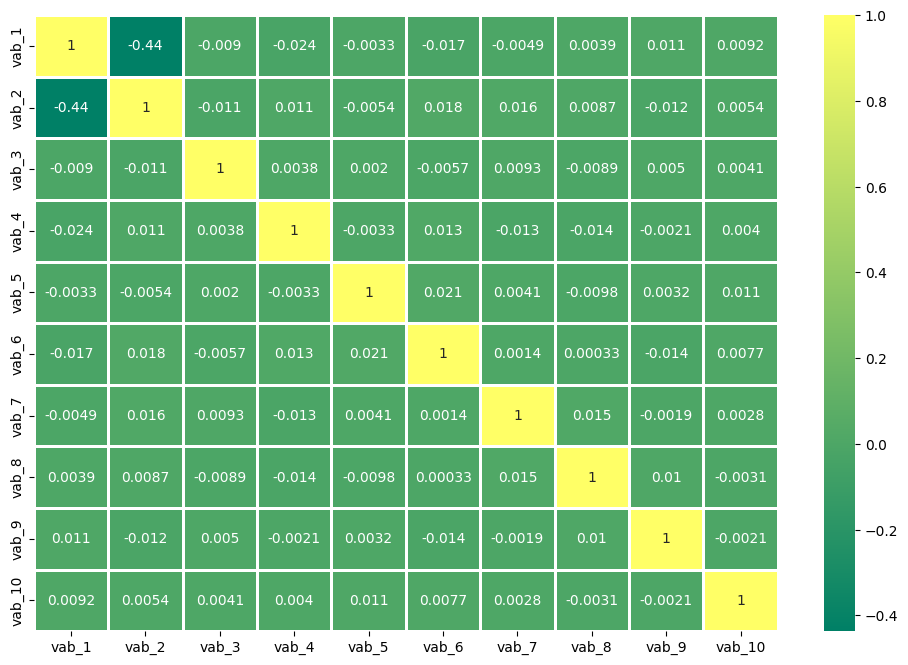

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df_moons.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',linewidths=1)

### data standardization

In [8]:
X_values = df_moons.iloc[:,:-1].values

In [9]:
y_values = df_moons.iloc[:,-1].values

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_values = scaler.fit_transform(X_values)

In [13]:
np.mean(X_values),np.std(X_values)

(4.874323167314287e-17, 0.9999999999999994)

In [14]:
pd.DataFrame(X_values)

,0,1,2,3,4,5,6,7,8,9
0,-0.052391,-0.745451,-0.734102,0.069916,-0.701768,-0.751729,0.317913,-0.769380,1.511643,-1.260637
1,-1.383186,-0.413818,0.044908,0.311565,-0.941034,1.216362,-0.462537,-1.446242,-0.521805,-0.100178
2,-0.100236,1.077265,0.209475,-1.299098,0.451025,-0.513434,-0.362848,-0.105703,2.033892,2.440668
3,-1.566596,-0.220089,0.526906,-0.301231,-1.185940,1.386364,0.252511,-0.054539,-0.853863,-0.411214
4,-1.649469,0.218309,0.796396,-0.351216,1.091968,-0.993196,-1.260656,0.577931,-0.468591,0.731774
...,...,...,...,...,...,...,...,...,...,...
9995,-0.368628,-0.220491,1.312770,-1.229826,-0.537584,-1.273598,-1.500583,0.914170,-0.699166,0.335236
9996,-0.514868,0.446451,-0.653752,1.390537,0.796153,0.383560,-1.724311,0.561272,-1.718286,-1.694081
9997,-0.618722,-0.008052,0.675172,-0.732762,-0.230853,0.365244,1.321524,-0.534282,0.208939,0.623504
9998,0.423039,0.544407,1.456708,-0.472180,2.168988,-0.027483,1.289180,-1.726000,1.054938,0.193715


<Axes: ylabel='Density'>

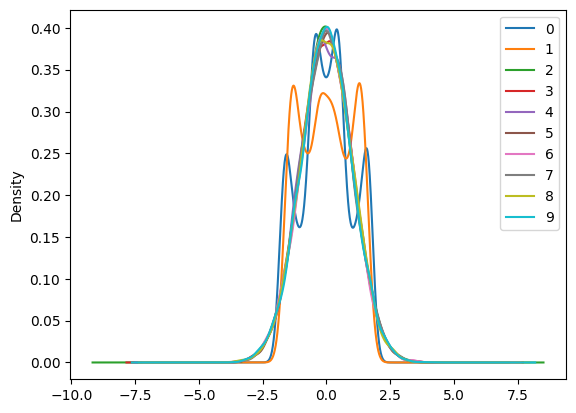

In [93]:
pd.DataFrame(X_values).plot(kind='density')

## pca application

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca_general = PCA()

In [17]:
pca_general.fit(X_values)

PCA()

In [18]:
explained_variance = pca_general.explained_variance_ratio_

In [19]:
explained_variance

array([0.14405127, 0.10372259, 0.10233776, 0.10122544, 0.10006952,
       0.09939033, 0.0991206 , 0.09747939, 0.09638027, 0.05622284])

In [20]:
eigenvalues = pca_general.explained_variance_

In [21]:
pd.DataFrame(eigenvalues)

,0
0,1.440657
1,1.037330
2,1.023480
3,1.012356
4,1.000795
5,0.994003
6,0.991305
7,0.974891
8,0.963899
9,0.562285


In [22]:
eigenvectors = pca_general.components_

### scree plot

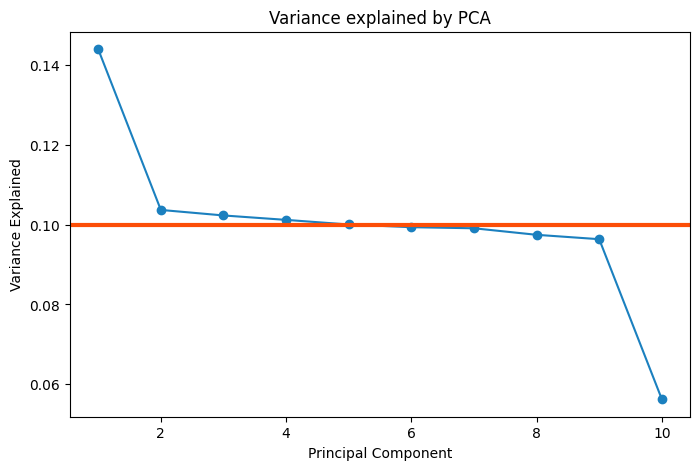

In [23]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [24]:
pca = PCA(n_components=2)

In [25]:
principal_components = pca.fit_transform(X_values)

In [26]:
pd.DataFrame(principal_components).head(8)

,0,1
0,0.573391,1.111866
1,-0.769636,-1.216695
2,-0.623062,0.296964
3,-1.055334,-0.125575
4,-1.211159,-0.203507
5,0.402553,-0.169413
6,0.351127,-1.061605
7,-0.611804,1.078545


In [27]:
principal_df = pd.DataFrame(data=principal_components,columns=['principal component 1','principal component 2'])

In [28]:
final_df = pd.concat([principal_df,df_moons[['target']]],axis=1)

In [29]:
final_df

,principal component 1,principal component 2,target
0,0.573391,1.111866,1
1,-0.769636,-1.216695,0
2,-0.623062,0.296964,0
3,-1.055334,-0.125575,0
4,-1.211159,-0.203507,0
...,...,...,...
9995,0.059828,1.028192,1
9996,-0.800339,-1.096579,1
9997,-0.436843,0.129790,1
9998,-0.039254,-1.007609,0


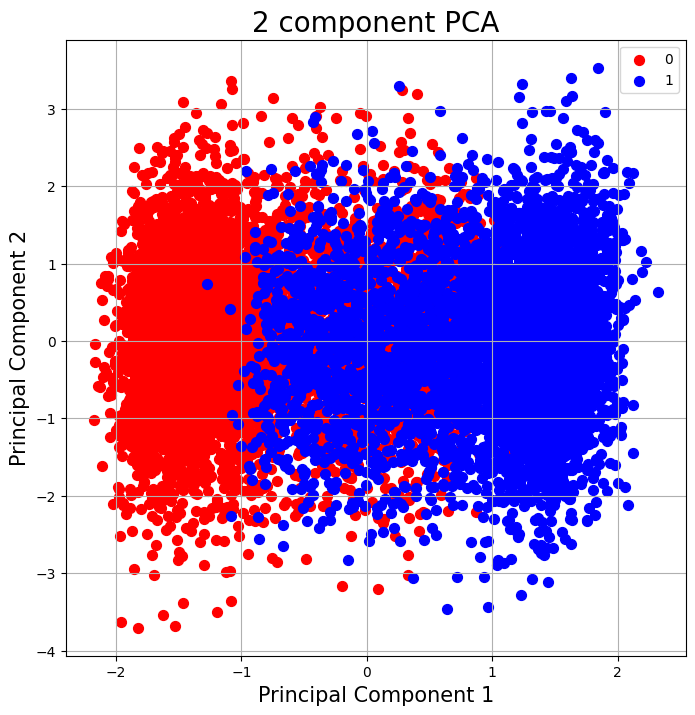

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

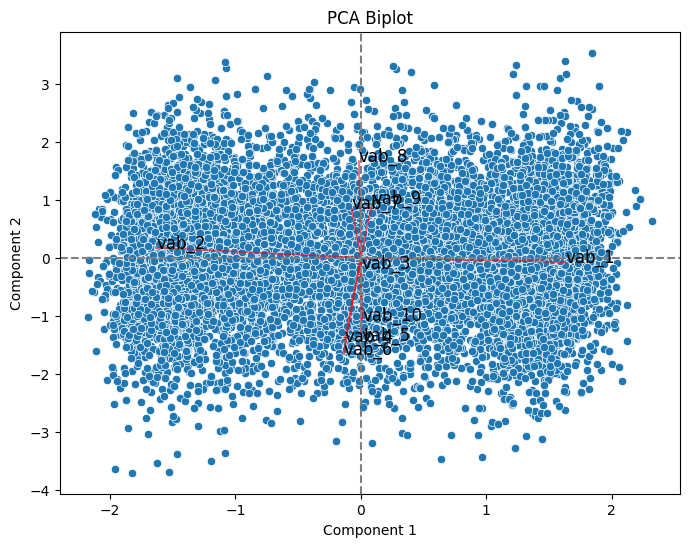

In [31]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_moons.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

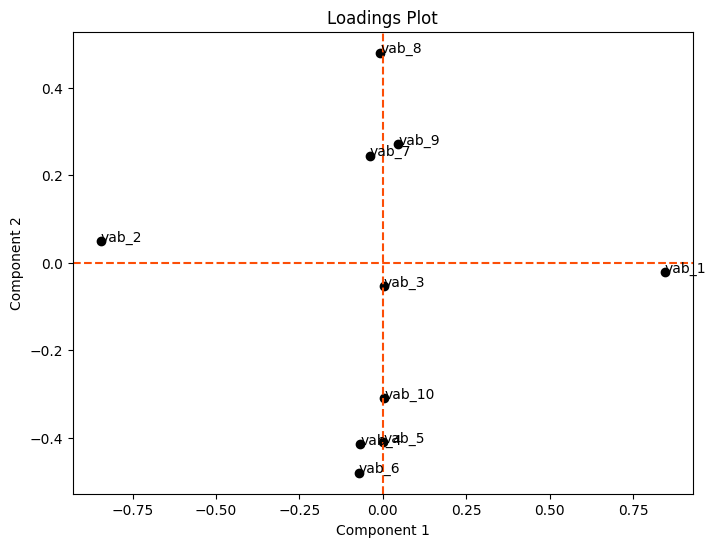

In [32]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_moons.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [33]:
scores_pca = pca.transform(X_values)

In [34]:
pd.DataFrame(scores_pca).head()

,0,1
0,0.573391,1.111866
1,-0.769636,-1.216695
2,-0.623062,0.296964
3,-1.055334,-0.125575
4,-1.211159,-0.203507


## t-SNE

In [35]:
tsne = TSNE(n_components=2,random_state=42)

In [36]:
X_tsne = tsne.fit_transform(X_values)

In [37]:
tsne_data = np.vstack((X_tsne.T,df_moons['target'])).T

In [38]:
tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','target'))

In [39]:
tsne_df

,dim_1,dim_2,target
0,24.294836,0.124358,1.0
1,-56.407322,-15.043243,0.0
2,-33.028702,-10.824656,0.0
3,-59.286522,13.861670,0.0
4,-66.964821,36.701641,0.0
...,...,...,...
9995,6.801509,32.627064,1.0
9996,-0.900112,55.742489,1.0
9997,3.615933,-23.933456,1.0
9998,-19.037092,-47.874451,0.0


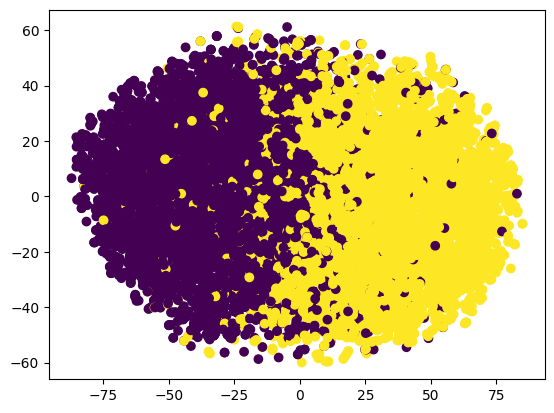

In [40]:
plt.scatter(x=tsne_df['dim_1'],y=tsne_df['dim_2'],c=tsne_df['target'])
plt.show()

In [41]:
tsne.kl_divergence_

3.246161460876465

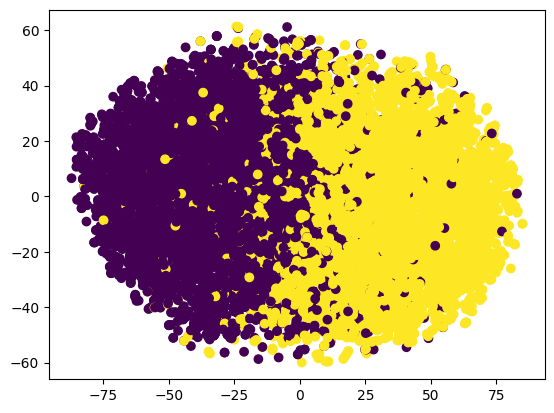

In [42]:
plt.scatter(x=X_tsne[:,0],y=X_tsne[:,1],c=y)
plt.show()

## clustering 

In [43]:
from sklearn.cluster import KMeans

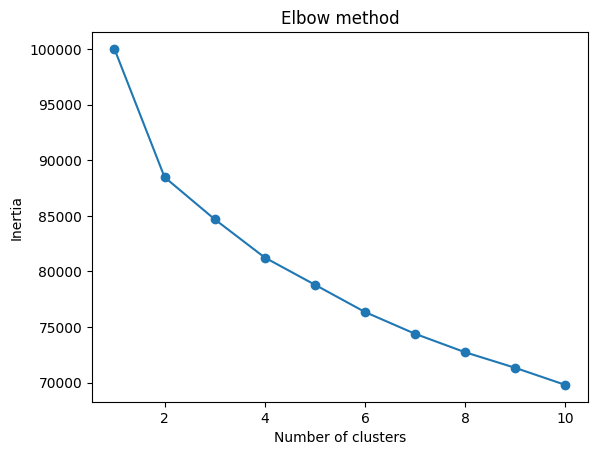

In [44]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=2,init='k-means++')

In [46]:
kmeans.fit(X_values)

KMeans(n_clusters=2)

In [47]:
df_moons['k_means'] = kmeans.labels_

In [48]:
df_moons

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means
0,0.455493,-0.125503,-0.073690,0.007148,-0.070106,-0.073503,0.033961,-0.076712,0.152614,-0.127183,1,1
1,-0.704217,0.041308,0.004495,0.031419,-0.093953,0.123181,-0.043611,-0.145589,-0.051010,-0.010903,0,0
2,0.413799,0.791322,0.021012,-0.130356,0.044793,-0.049688,-0.033703,-0.009176,0.204911,0.243696,0,0
3,-0.864049,0.138754,0.052871,-0.030130,-0.118363,0.140171,0.027461,-0.003970,-0.084262,-0.042069,0,0
4,-0.936268,0.359267,0.079918,-0.035151,0.108675,-0.097634,-0.122940,0.060390,-0.045682,0.072461,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,0.131744,-0.123398,-0.053741,-0.125656,-0.146788,0.094606,-0.068771,0.032727,1,0
9996,0.052471,0.474023,-0.065626,0.139791,0.079191,0.039954,-0.169025,0.058695,-0.170823,-0.170616,1,0
9997,-0.038031,0.245408,0.067752,-0.073473,-0.023170,0.038124,0.133715,-0.052788,0.022165,0.061612,1,0
9998,0.869802,0.523295,0.146190,-0.047300,0.216021,-0.001124,0.130500,-0.174057,0.106881,0.018546,0,0


In [49]:
from scipy.optimize import linear_sum_assignment

y_true = df_moons['target'].values  
y_kmeans = df_moons['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_moons['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_moons['k_means'] == y_true))

accuracy before: 0.8503
accuracy after: 0.8503


In [50]:
df_moons

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means
0,0.455493,-0.125503,-0.073690,0.007148,-0.070106,-0.073503,0.033961,-0.076712,0.152614,-0.127183,1,1
1,-0.704217,0.041308,0.004495,0.031419,-0.093953,0.123181,-0.043611,-0.145589,-0.051010,-0.010903,0,0
2,0.413799,0.791322,0.021012,-0.130356,0.044793,-0.049688,-0.033703,-0.009176,0.204911,0.243696,0,0
3,-0.864049,0.138754,0.052871,-0.030130,-0.118363,0.140171,0.027461,-0.003970,-0.084262,-0.042069,0,0
4,-0.936268,0.359267,0.079918,-0.035151,0.108675,-0.097634,-0.122940,0.060390,-0.045682,0.072461,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,0.131744,-0.123398,-0.053741,-0.125656,-0.146788,0.094606,-0.068771,0.032727,1,0
9996,0.052471,0.474023,-0.065626,0.139791,0.079191,0.039954,-0.169025,0.058695,-0.170823,-0.170616,1,0
9997,-0.038031,0.245408,0.067752,-0.073473,-0.023170,0.038124,0.133715,-0.052788,0.022165,0.061612,1,0
9998,0.869802,0.523295,0.146190,-0.047300,0.216021,-0.001124,0.130500,-0.174057,0.106881,0.018546,0,0


In [51]:
print(np.unique(df_moons['target']))

[0 1]


In [52]:
print(np.unique(kmeans.labels_))

[0 1]


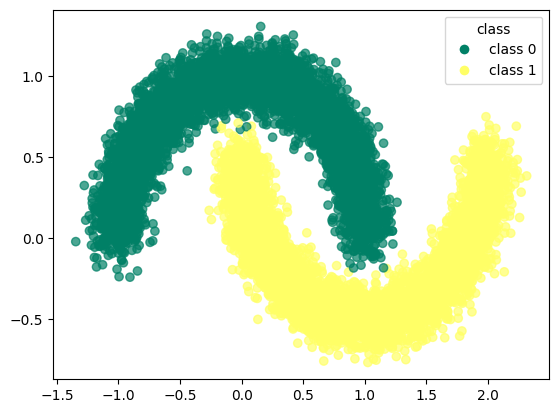

In [53]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_moons.iloc[:, 0], df_moons.iloc[:, 1], 
                      c=df_moons['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_moons['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                        for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

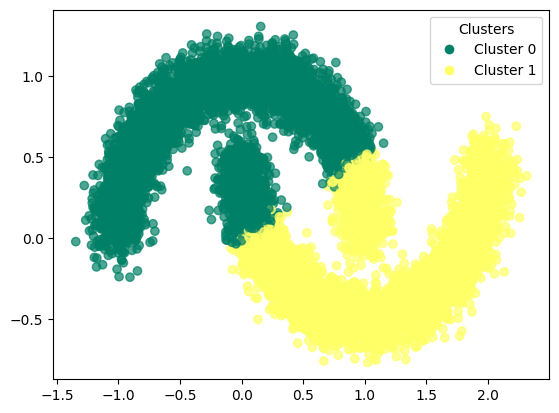

In [54]:
scatter = plt.scatter(df_moons.iloc[:, 0], df_moons.iloc[:, 1], 
                      c=df_moons['k_means'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_moons['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [55]:
kmeans.cluster_centers_

array([[-0.73242579,  0.78123767,  0.00275128,  0.02529809,  0.01551572,
         0.03023502,  0.02326354, -0.00359878, -0.02037197,  0.0071022 ],
       [ 0.73418572, -0.78311489, -0.00275789, -0.02535888, -0.015553  ,
        -0.03030767, -0.02331944,  0.00360742,  0.02042092, -0.00711927]])

In [56]:
print(confusion_matrix(df_moons['target'],df_moons['k_means']))

[[4253  747]
 [ 750 4250]]


In [57]:
print(classification_report(df_moons['target'],df_moons['k_means']))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5000
           1       0.85      0.85      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### clustering with pca

In [58]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++")
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

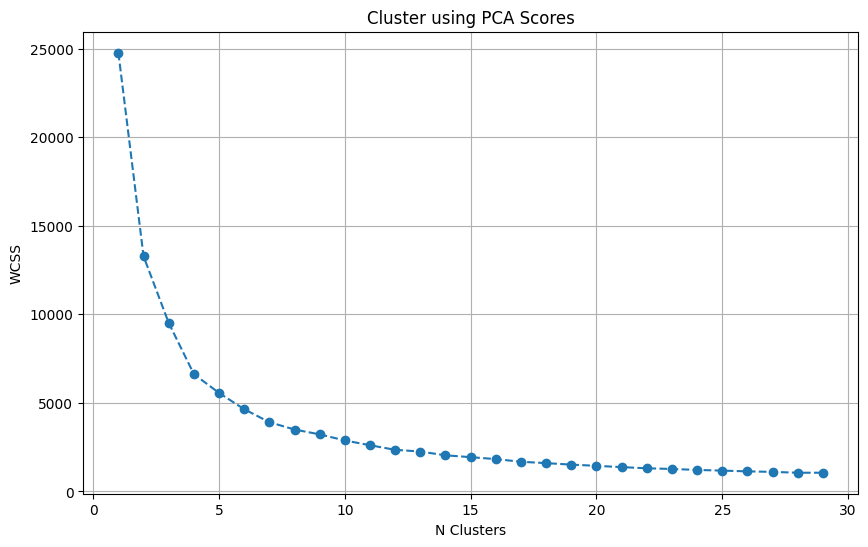

In [59]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [60]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++')

In [61]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2)

In [62]:
df_pca_kmeans = df_moons.copy()

In [63]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [64]:
df_pca_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_pca
0,0.455493,-0.125503,-0.073690,0.007148,-0.070106,-0.073503,0.033961,-0.076712,0.152614,-0.127183,1,1,1
1,-0.704217,0.041308,0.004495,0.031419,-0.093953,0.123181,-0.043611,-0.145589,-0.051010,-0.010903,0,0,0
2,0.413799,0.791322,0.021012,-0.130356,0.044793,-0.049688,-0.033703,-0.009176,0.204911,0.243696,0,0,0
3,-0.864049,0.138754,0.052871,-0.030130,-0.118363,0.140171,0.027461,-0.003970,-0.084262,-0.042069,0,0,0
4,-0.936268,0.359267,0.079918,-0.035151,0.108675,-0.097634,-0.122940,0.060390,-0.045682,0.072461,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,0.131744,-0.123398,-0.053741,-0.125656,-0.146788,0.094606,-0.068771,0.032727,1,0,1
9996,0.052471,0.474023,-0.065626,0.139791,0.079191,0.039954,-0.169025,0.058695,-0.170823,-0.170616,1,0,0
9997,-0.038031,0.245408,0.067752,-0.073473,-0.023170,0.038124,0.133715,-0.052788,0.022165,0.061612,1,0,0
9998,0.869802,0.523295,0.146190,-0.047300,0.216021,-0.001124,0.130500,-0.174057,0.106881,0.018546,0,0,0


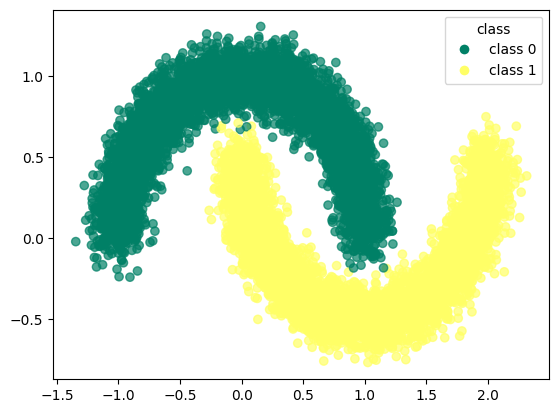

In [65]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

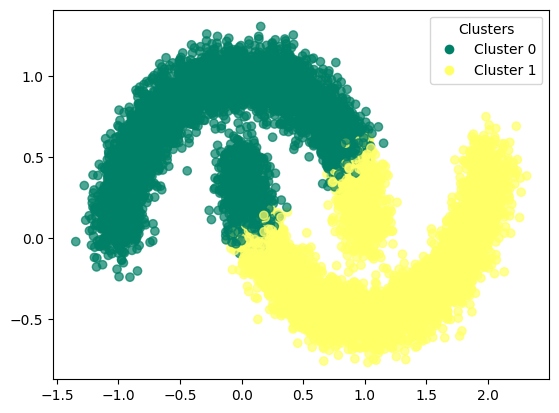

In [66]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [67]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.8472
accuracy after: 0.8472


In [68]:
df_pca_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_pca
0,0.455493,-0.125503,-0.073690,0.007148,-0.070106,-0.073503,0.033961,-0.076712,0.152614,-0.127183,1,1,1
1,-0.704217,0.041308,0.004495,0.031419,-0.093953,0.123181,-0.043611,-0.145589,-0.051010,-0.010903,0,0,0
2,0.413799,0.791322,0.021012,-0.130356,0.044793,-0.049688,-0.033703,-0.009176,0.204911,0.243696,0,0,0
3,-0.864049,0.138754,0.052871,-0.030130,-0.118363,0.140171,0.027461,-0.003970,-0.084262,-0.042069,0,0,0
4,-0.936268,0.359267,0.079918,-0.035151,0.108675,-0.097634,-0.122940,0.060390,-0.045682,0.072461,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,0.131744,-0.123398,-0.053741,-0.125656,-0.146788,0.094606,-0.068771,0.032727,1,0,1
9996,0.052471,0.474023,-0.065626,0.139791,0.079191,0.039954,-0.169025,0.058695,-0.170823,-0.170616,1,0,0
9997,-0.038031,0.245408,0.067752,-0.073473,-0.023170,0.038124,0.133715,-0.052788,0.022165,0.061612,1,0,0
9998,0.869802,0.523295,0.146190,-0.047300,0.216021,-0.001124,0.130500,-0.174057,0.106881,0.018546,0,0,0


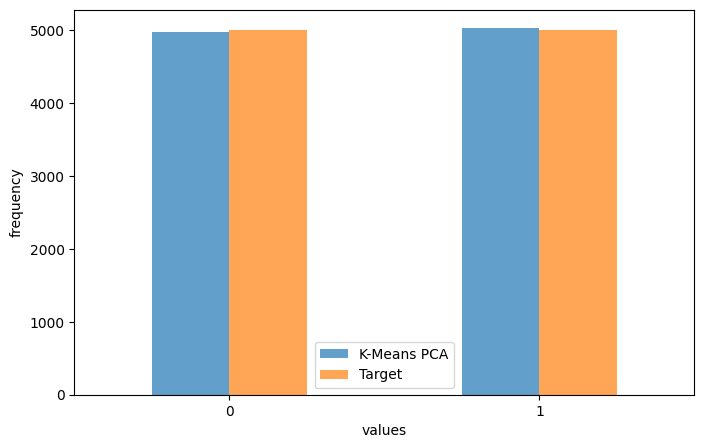

In [69]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [70]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[4224  776]
 [ 752 4248]]


In [71]:
print(classification_report(df_moons['target'],df_moons['k_means']))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5000
           1       0.85      0.85      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [72]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5000
           1       0.85      0.85      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



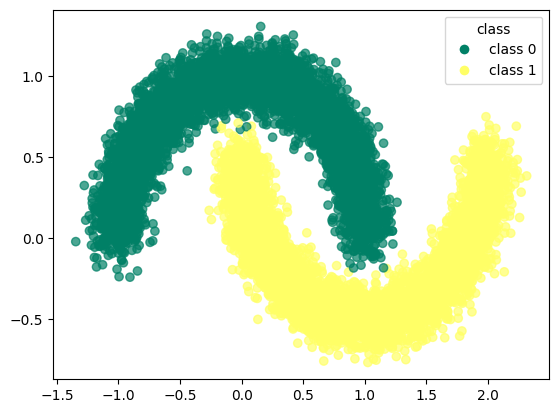

In [73]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

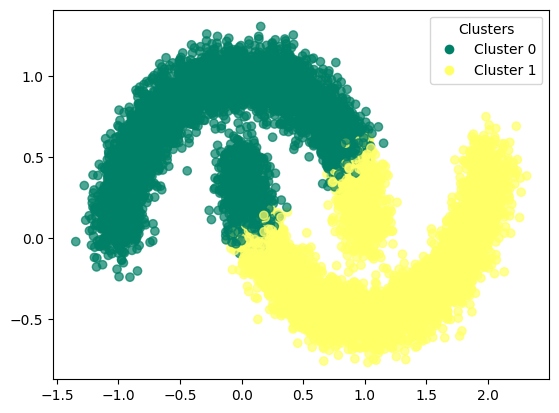

In [74]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

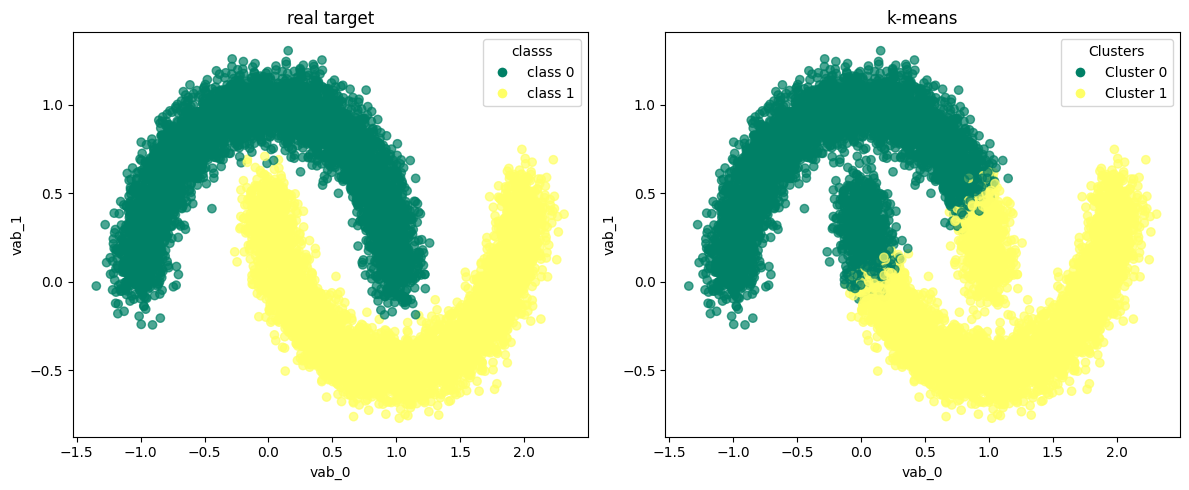

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

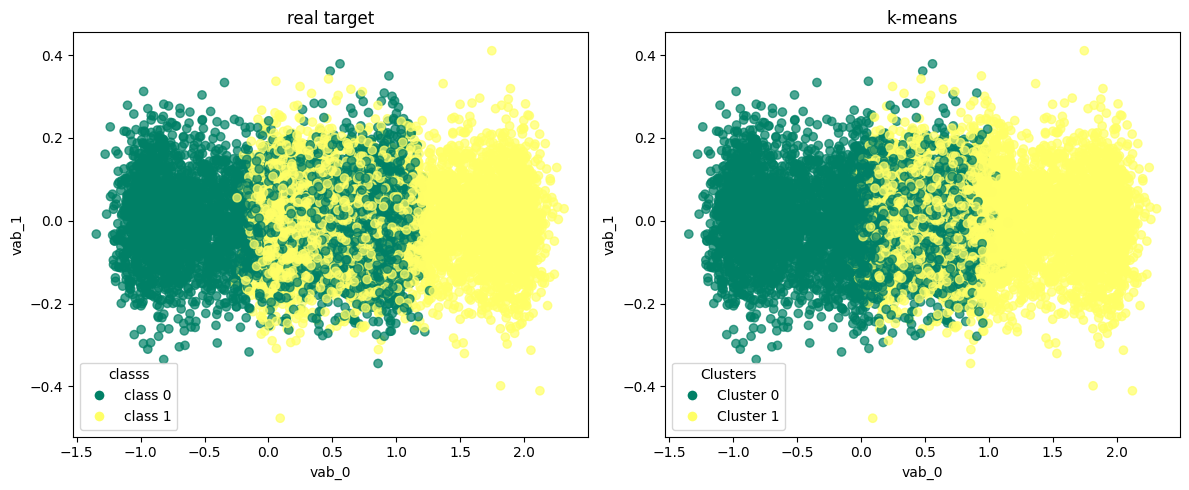

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

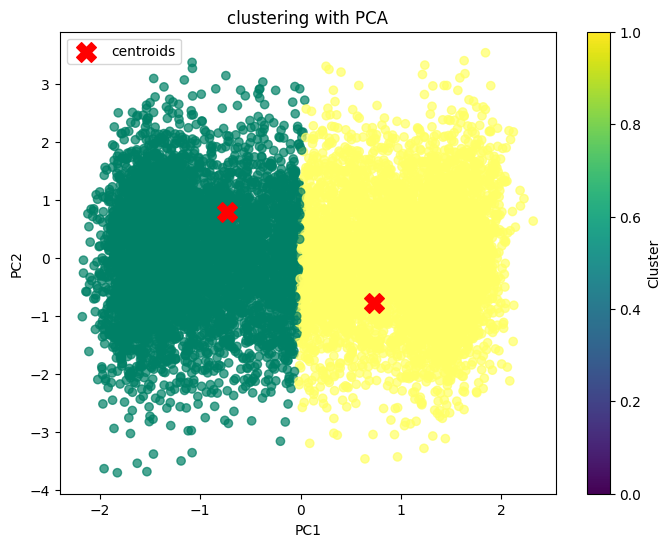

In [77]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

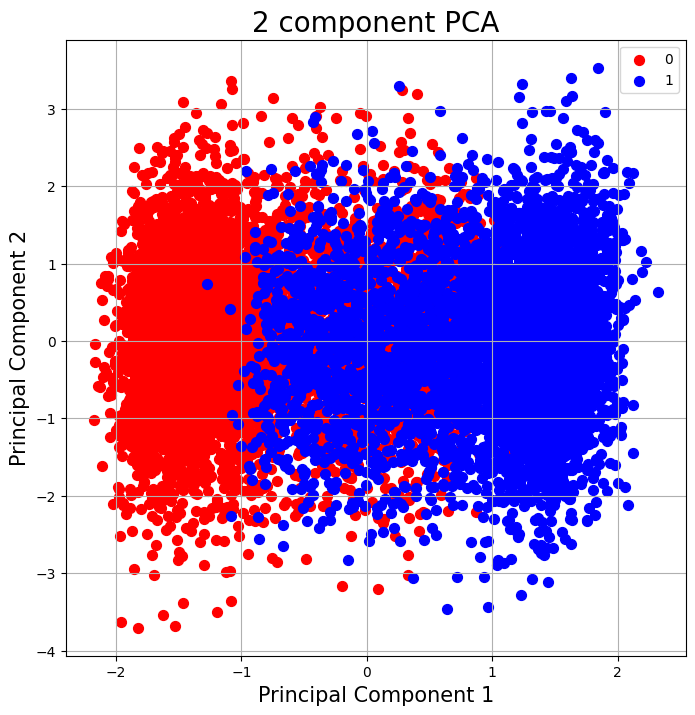

In [78]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### clustering with t-SNE

In [79]:
kmeans_tsne = KMeans(n_clusters=2,init='k-means++')

In [80]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=2)

In [81]:
df_tsne_kmeans = df_moons.copy()

In [82]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [83]:
df_tsne_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_tsne
0,0.455493,-0.125503,-0.073690,0.007148,-0.070106,-0.073503,0.033961,-0.076712,0.152614,-0.127183,1,1,1
1,-0.704217,0.041308,0.004495,0.031419,-0.093953,0.123181,-0.043611,-0.145589,-0.051010,-0.010903,0,0,0
2,0.413799,0.791322,0.021012,-0.130356,0.044793,-0.049688,-0.033703,-0.009176,0.204911,0.243696,0,0,0
3,-0.864049,0.138754,0.052871,-0.030130,-0.118363,0.140171,0.027461,-0.003970,-0.084262,-0.042069,0,0,0
4,-0.936268,0.359267,0.079918,-0.035151,0.108675,-0.097634,-0.122940,0.060390,-0.045682,0.072461,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,0.131744,-0.123398,-0.053741,-0.125656,-0.146788,0.094606,-0.068771,0.032727,1,0,1
9996,0.052471,0.474023,-0.065626,0.139791,0.079191,0.039954,-0.169025,0.058695,-0.170823,-0.170616,1,0,0
9997,-0.038031,0.245408,0.067752,-0.073473,-0.023170,0.038124,0.133715,-0.052788,0.022165,0.061612,1,0,1
9998,0.869802,0.523295,0.146190,-0.047300,0.216021,-0.001124,0.130500,-0.174057,0.106881,0.018546,0,0,0


In [84]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.9024
accuracy after: 0.9024


In [85]:
df_tsne_kmeans

,vab_1,vab_2,vab_3,vab_4,vab_5,vab_6,vab_7,vab_8,vab_9,vab_10,target,k_means,kmeans_tsne
0,0.455493,-0.125503,-0.073690,0.007148,-0.070106,-0.073503,0.033961,-0.076712,0.152614,-0.127183,1,1,1
1,-0.704217,0.041308,0.004495,0.031419,-0.093953,0.123181,-0.043611,-0.145589,-0.051010,-0.010903,0,0,0
2,0.413799,0.791322,0.021012,-0.130356,0.044793,-0.049688,-0.033703,-0.009176,0.204911,0.243696,0,0,0
3,-0.864049,0.138754,0.052871,-0.030130,-0.118363,0.140171,0.027461,-0.003970,-0.084262,-0.042069,0,0,0
4,-0.936268,0.359267,0.079918,-0.035151,0.108675,-0.097634,-0.122940,0.060390,-0.045682,0.072461,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.179911,0.138552,0.131744,-0.123398,-0.053741,-0.125656,-0.146788,0.094606,-0.068771,0.032727,1,0,1
9996,0.052471,0.474023,-0.065626,0.139791,0.079191,0.039954,-0.169025,0.058695,-0.170823,-0.170616,1,0,0
9997,-0.038031,0.245408,0.067752,-0.073473,-0.023170,0.038124,0.133715,-0.052788,0.022165,0.061612,1,0,1
9998,0.869802,0.523295,0.146190,-0.047300,0.216021,-0.001124,0.130500,-0.174057,0.106881,0.018546,0,0,0


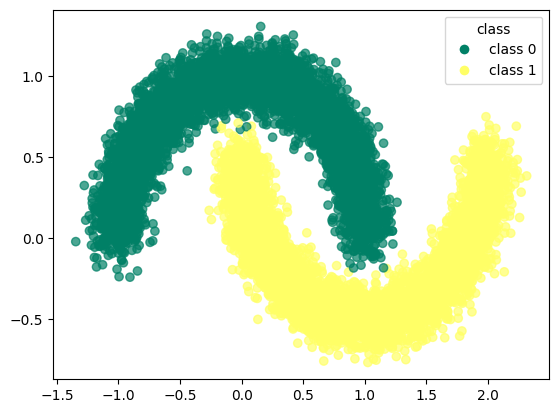

In [86]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

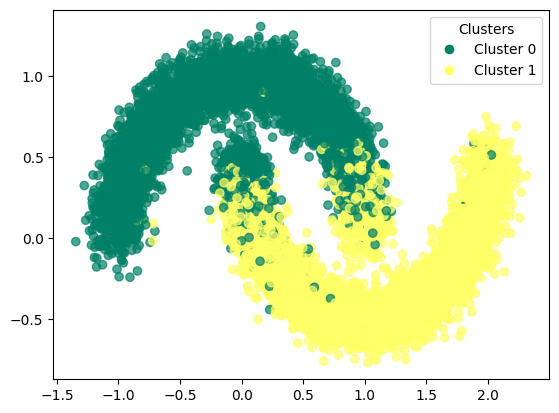

In [87]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

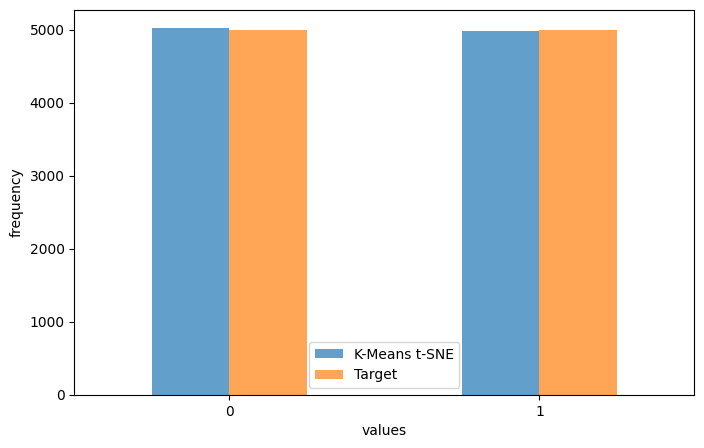

In [88]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar',figsize=(8, 5),alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [89]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[4522  478]
 [ 498 4502]]


In [90]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5000
           1       0.90      0.90      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [91]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5000
           1       0.85      0.85      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [92]:
print(classification_report(df_moons['target'],df_moons['k_means']))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5000
           1       0.85      0.85      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

